In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("salary_data.csv")

In [3]:
# data = data.sample(frac = 1)

In [4]:
data_train  = data.iloc[0 : 20 , [0 , 1]]

data_train.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
data_test = data.iloc[20 : ]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C9AA7EB508>,
      dtype=object)

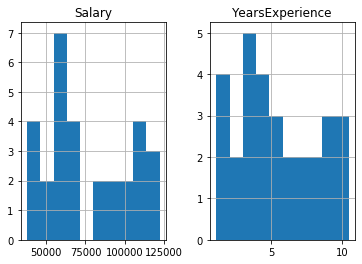

In [6]:
data.hist()

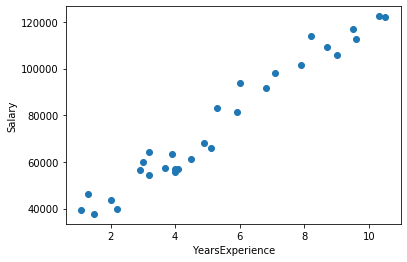

In [7]:
plt.scatter(data["YearsExperience"] , data["Salary"]) 
plt.xlabel("YearsExperience") 
plt.ylabel("Salary")
plt.show()

In [8]:
def simple_linear_regression(feature , output) :
    
    Xi = feature
    Yi = output
    N = len(Xi)
    
    Yi_mean = Yi.mean()
    Xi_mean = Xi.mean()
    
    S_YiXi = (Yi*Xi).sum()
    Yi_Xi_ByN = (Yi.sum() * Xi.sum()) / N
    
    S_XiXi = (Xi*Xi).sum()
    XiXi_ByN = (Xi.sum() * Xi.sum()) / N
    
    slope = (S_YiXi - Yi_Xi_ByN) / (S_XiXi - XiXi_ByN)
    
    intercept = Yi_mean - slope * Xi_mean
    
    return (intercept , slope)

TESTING WITH BASIC DATA

In [9]:
f = np.array((1,2,3,4,5))
o = np.array((1,2,3,4,5))
# o = np.array(1 + 1*f)

i , s = simple_linear_regression(f , o)

print("slope : " , s)
print("intercept : " , i)

slope :  1.0
intercept :  0.0


WORKS PERFECTELY FINE

TRAINING THE MODEL

In [10]:
intercept , slope = simple_linear_regression(data_train["YearsExperience"] , data_train["Salary"])

print("INTERCEPT : " , intercept)
print("SLOPE : " , slope)

INTERCEPT :  26577.400019513207
SLOPE :  9116.1142006927


PLOT THE REGRESSION LINE 

Text(0.5, 0, 'SALARY')

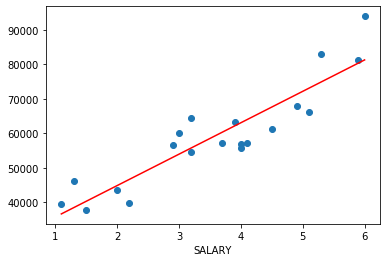

In [11]:
plt.scatter(data_train["YearsExperience"] , data_train["Salary"])
plt.plot(data_train["YearsExperience"] , slope * data_train["YearsExperience"] + intercept , '-r')

plt.xlabel("YEARS")
plt.xlabel("SALARY")

In [12]:
def prediction(features , intercept , slope) :
    
    predicted = features * slope + intercept
    
    return predicted

In [13]:
def inverse_prediction(output , intercept , slope) :
    
    feature = (output - intercept) / slope
    
    return feature

1) Residual Sum of Squares

In [14]:
def rsss(feature , output , intercept , slope) :
    
    prediction = feature * slope + intercept
    
    residual = output - prediction
    
    RSS = (residual*residual).sum()
    
    return RSS

In [15]:
print(rsss(data_test["YearsExperience"] , data_test["Salary"] , intercept , slope))

263927696.86983615


2) R - SQUARED

In [16]:
def RSquared(feature , output , intercept , slope) :
    
    prediction = feature * slope + intercept
    
    residual = output - prediction
    
    RES = (residual*residual).sum()
    
    REST = output - output.mean()
    
    TOT = (REST*REST).sum()
    
    return (1 - RES/TOT)

In [17]:
print(RSquared(data_test["YearsExperience"] , data_test["Salary"] , intercept , slope))

0.7154263893578967


3) MEAN ABSOLUTE ERROR

In [18]:
def MeanAbsoluteError(feature , output , intercept , slope) :
    
    prediction = feature * slope + intercept
    
    Yi = output
    
    var = (Yi - prediction).abs().sum()
    
    MAE = var/len(Yi)
    
    return MAE

In [19]:
print(MeanAbsoluteError(data_test["YearsExperience"] , data_test["Salary"] , intercept , slope))

3950.36424215818


4) MEAN SQUARE ERROR

In [20]:
def MeanSquareError(feature , output , intercept , slope) :
    
    prediction = feature * slope + intercept
    
    Yi = output
    
    var = ((Yi - prediction)*(Yi - prediction)).sum()
    
    MSE = var/len(Yi)
    
    return MSE

In [21]:
print(MeanSquareError(data_test["YearsExperience"] , data_test["Salary"] , intercept , slope))

26392769.686983615


5) MEAN ABSOLUTE PERCENTAGE ERROR 

In [22]:
def MeanAbsoltePercentageError(feature , output , intercept , slope) :
    
    prediction = feature * slope + intercept
    
    Yi = output
    
    var = ((Yi - prediction)/Yi).abs().sum()
    
    MAPE = var/len(Yi)*100
    
    return MAPE

In [23]:
print(MeanAbsoltePercentageError(data_test["YearsExperience"] , data_test["Salary"] , intercept , slope))

3.6755884250131294


6) MEAN PERCENTAGE ERROR

In [24]:
def MeanPercentageError(feature , output , intercept , slope) :
    
    prediction = feature * slope + intercept
    
    Yi = output
    
    var = ((Yi - prediction)/Yi).sum()
    
    MPE = var/len(Yi)*100
    
    return MPE

In [25]:
print(MeanPercentageError(data_test["YearsExperience"] , data_test["Salary"] , intercept , slope))

2.7712432542231156
